# Bearing Fault Analysis

### Life cycle of Machine learning Project
> Understanding the Problem Statement
> 
> Data Collection
> 
> Data Checks to perform
> 
> Exploratory data analysis
> 
> Data Pre-Processing
> 
> Model Training
> 
> Choose best mode

## 1) Problem statement
##### This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
## 2) Data Collection
##### Dataset Source - https://www.kaggle.com/datasets/brjapon/cwru-bearing-datasets?select=feature_time_48k_2048_load_1.csv

## 2.1 Import Data and Required Packages


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/raw.csv')


In [4]:
df.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1


In [ ]:
df.shape

(2300, 10)

In [6]:
df.isna().sum()

max         0
min         0
mean        0
sd          0
rms         0
skewness    0
kurtosis    0
crest       0
form        0
fault       0
dtype: int64

##### There are no missing values in the data set

In [7]:

df.duplicated().sum()

np.int64(0)

##### There are no duplicates values in the data set

In [13]:

# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max       2300 non-null   float64
 1   min       2300 non-null   float64
 2   mean      2300 non-null   float64
 3   sd        2300 non-null   float64
 4   rms       2300 non-null   float64
 5   skewness  2300 non-null   float64
 6   kurtosis  2300 non-null   float64
 7   crest     2300 non-null   float64
 8   form      2300 non-null   float64
 9   fault     2300 non-null   object 
dtypes: float64(9), object(1)
memory usage: 179.8+ KB


In [16]:
df.nunique()

max         1963
min         1978
mean        2300
sd          2300
rms         2300
skewness    2300
kurtosis    2300
crest       2300
form        2300
fault         10
dtype: int64

##### Check statistics of data set

In [17]:

df.describe()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,1.575079,-1.550994,0.015711,0.341601,0.342289,-0.042251,2.664444,4.173130,26.544769
std,1.578422,1.602706,0.006469,0.305279,0.304813,0.180774,4.411096,1.148349,29.209702
min,0.157300,-6.292600,0.003246,0.059140,0.061067,-1.089928,-0.803795,2.428511,3.484429
25%,0.456398,-2.174975,0.011236,0.135506,0.136374,-0.103426,-0.015164,3.260382,7.413359
50%,0.794510,-0.733700,0.013730,0.188551,0.190662,-0.002466,0.816970,3.921650,13.122811
75%,2.278425,-0.426987,0.018638,0.555589,0.555671,0.061093,3.902286,4.815876,39.911894
max,6.825900,-0.160220,0.038386,1.256577,1.256311,1.059512,30.385326,8.821577,313.742612


In [18]:
df.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1


In [19]:
print("Categories in 'fault' variable:     ",end=" " )
print(df['fault'].unique())

Categories in 'fault' variable:      ['Ball_007_1' 'Ball_014_1' 'Ball_021_1' 'IR_007_1' 'IR_014_1' 'IR_021_1'
 'OR_007_6_1' 'OR_014_6_1' 'OR_021_6_1' 'Normal_1']


In [20]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['max', 'min', 'mean', 'sd', 'rms', 'skewness', 'kurtosis', 'crest', 'form']

We have 1 categorical features : ['fault']


### Class Distribution

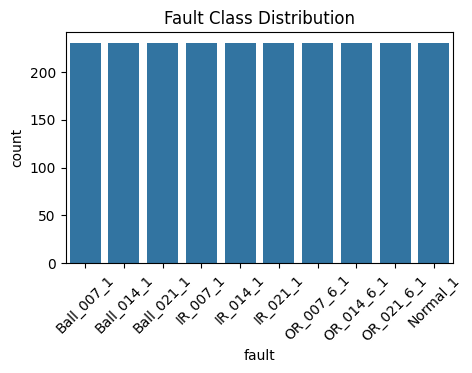

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
sns.countplot(data=df, x='fault', order=df['fault'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Fault Class Distribution")
plt.show()

###  Boxplots for Feature Comparison Across Faults

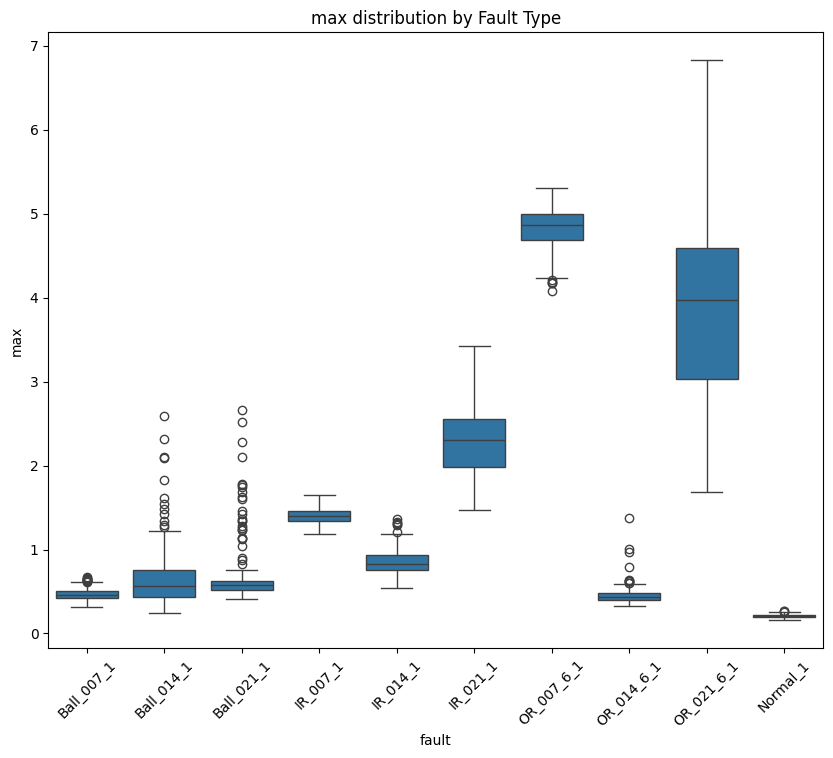

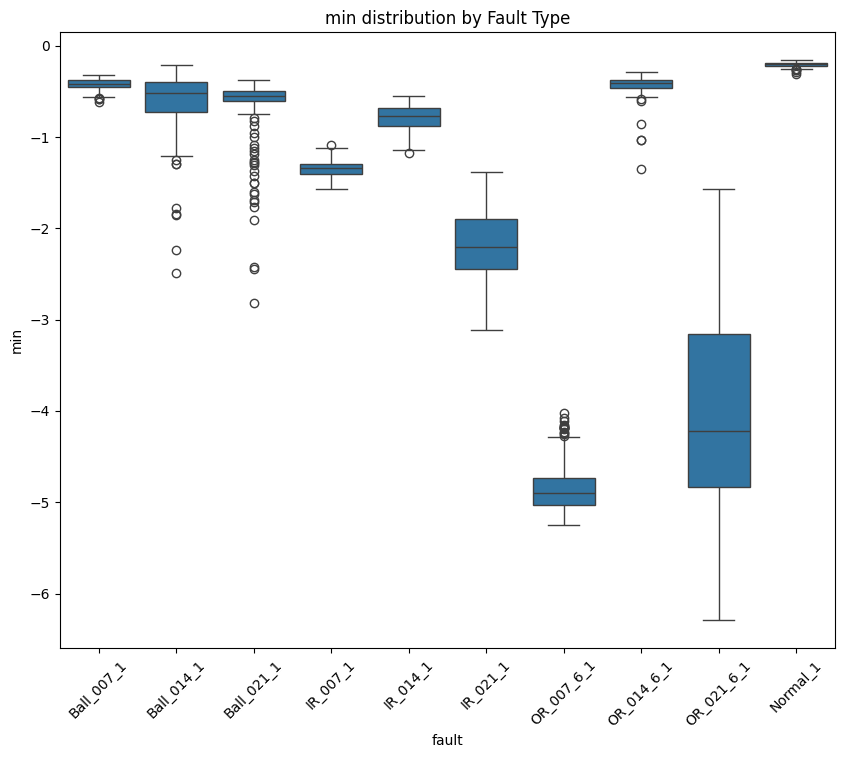

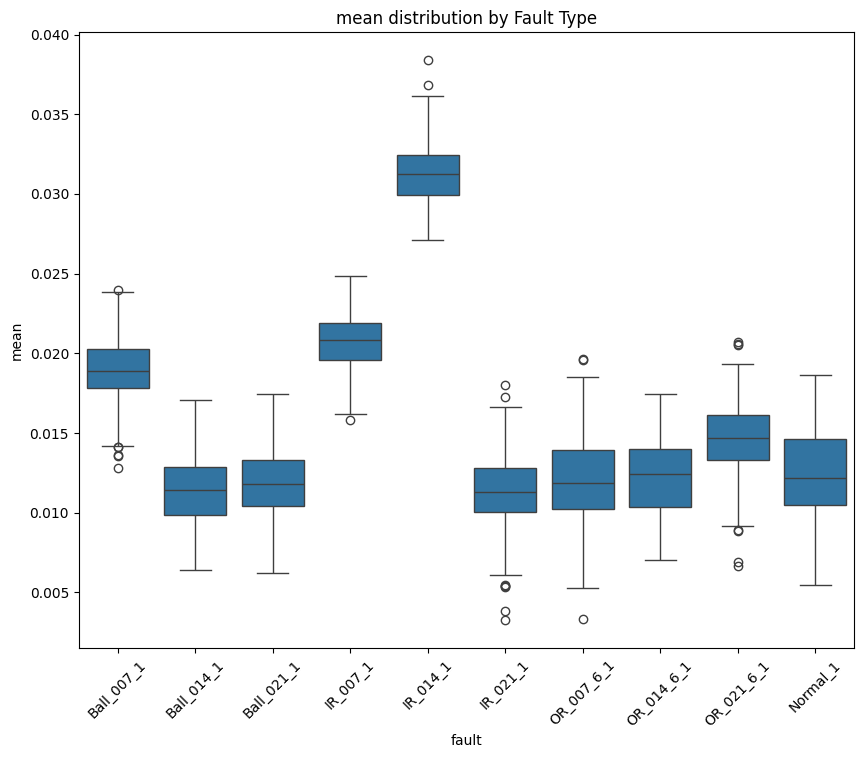

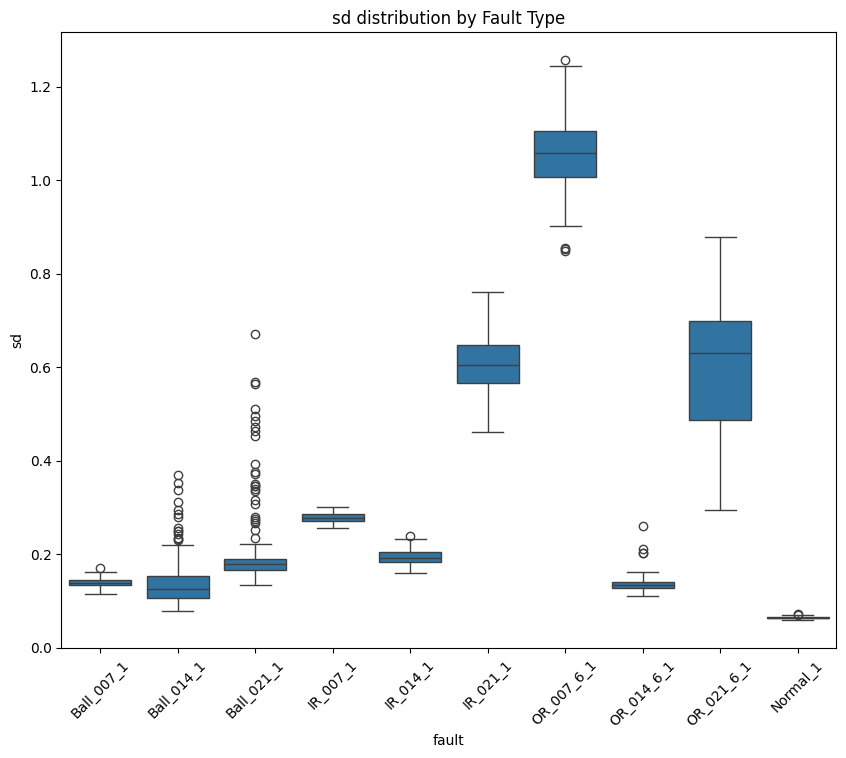

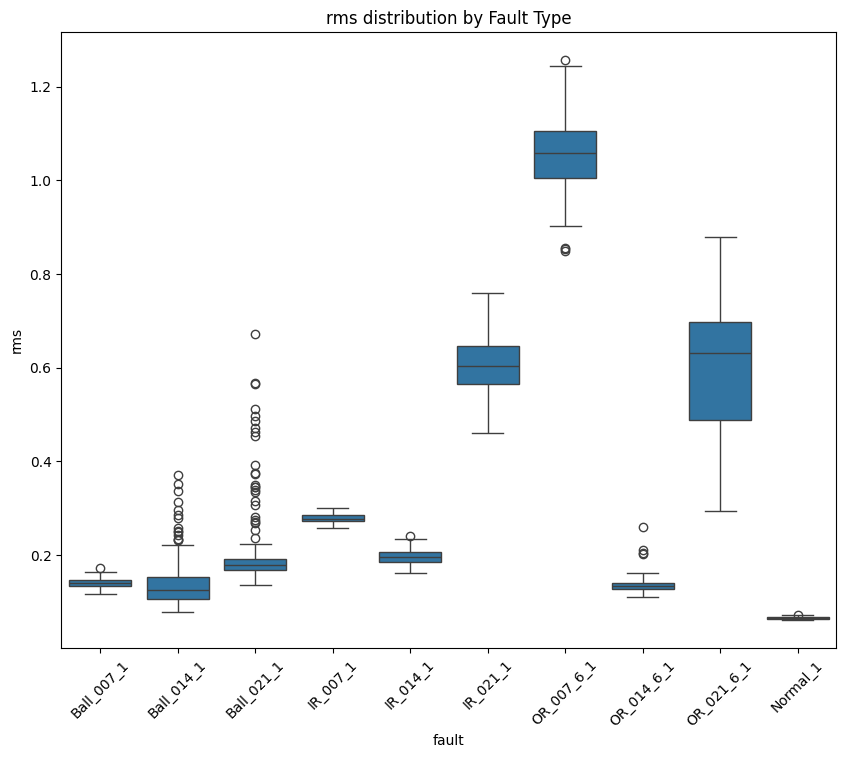

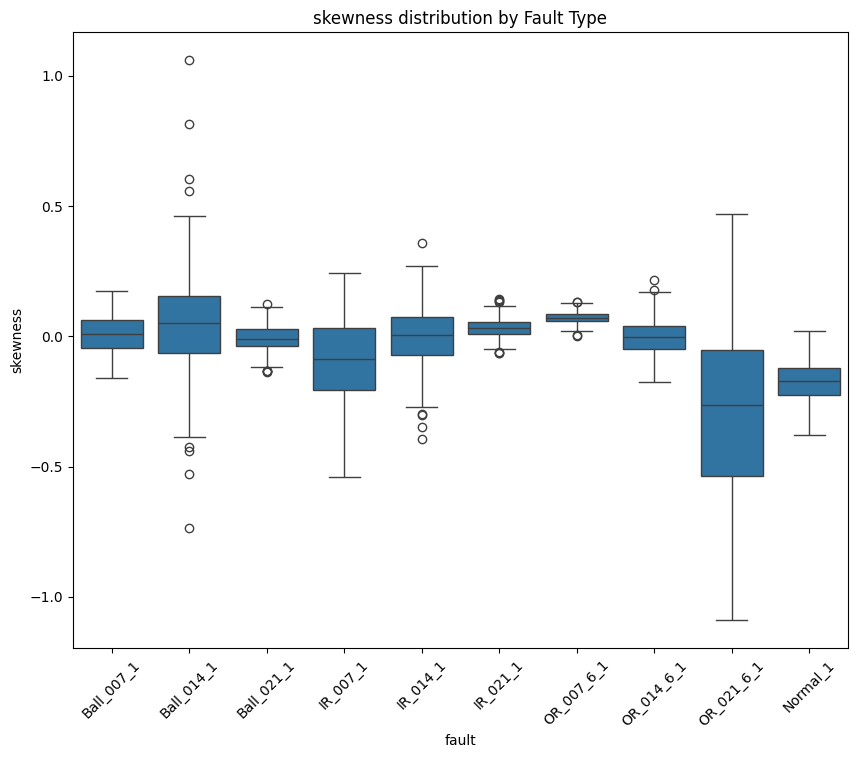

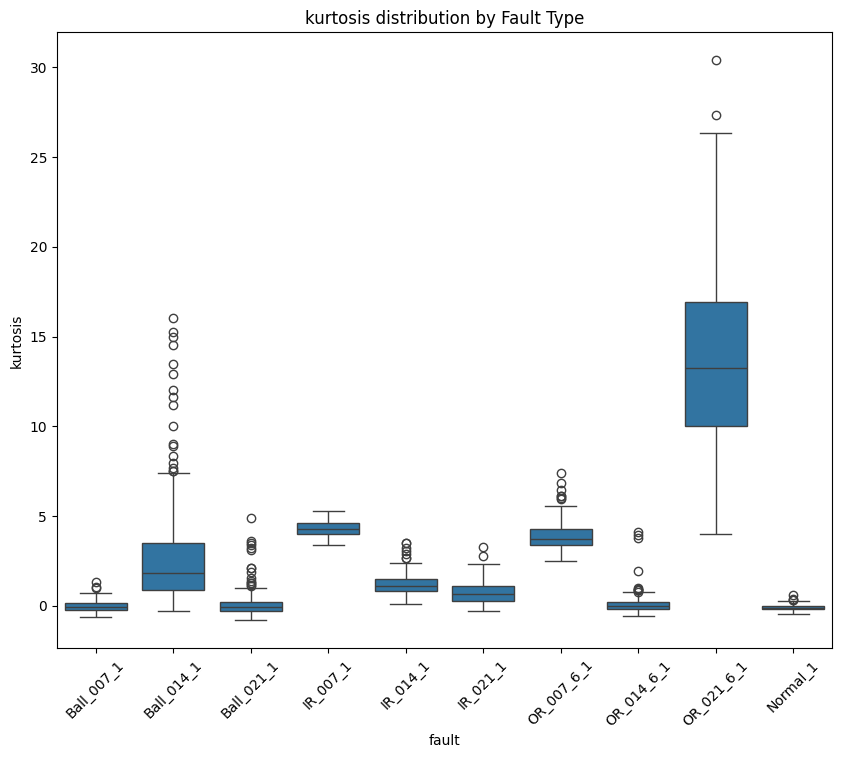

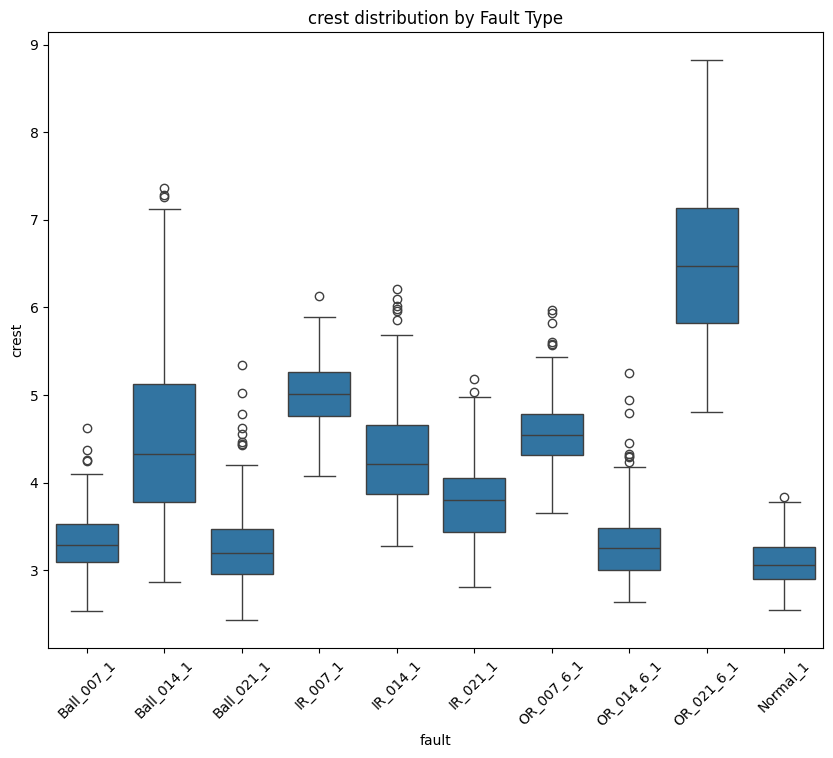

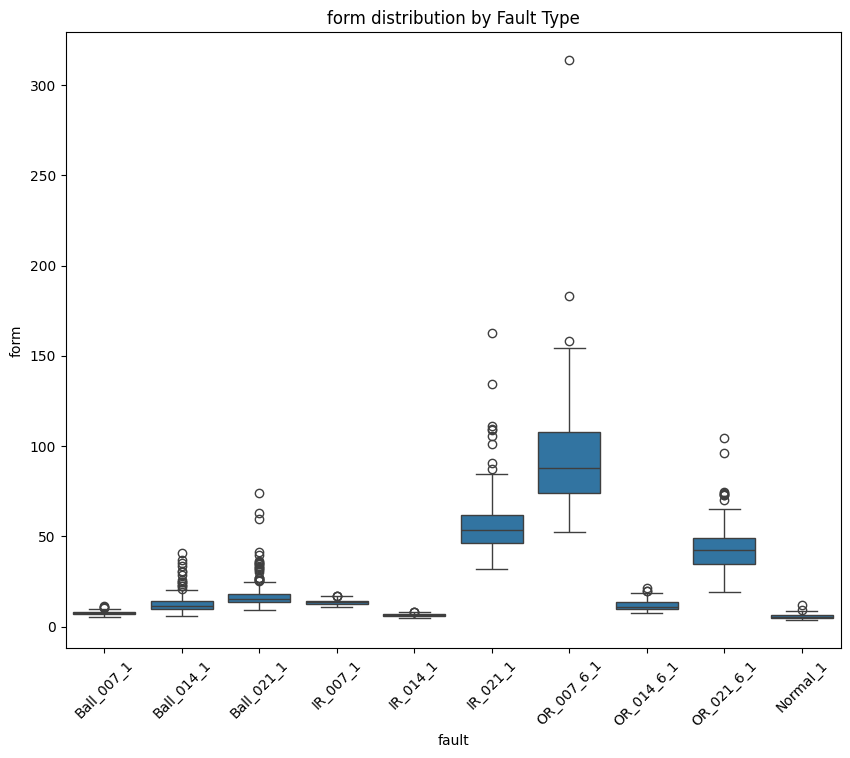

In [33]:
for col in numeric_features:
    plt.figure(figsize=(10,8))
    sns.boxplot(x='fault', y=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'{col} distribution by Fault Type')
    plt.show()


###  Pairplot for Visual Clustering

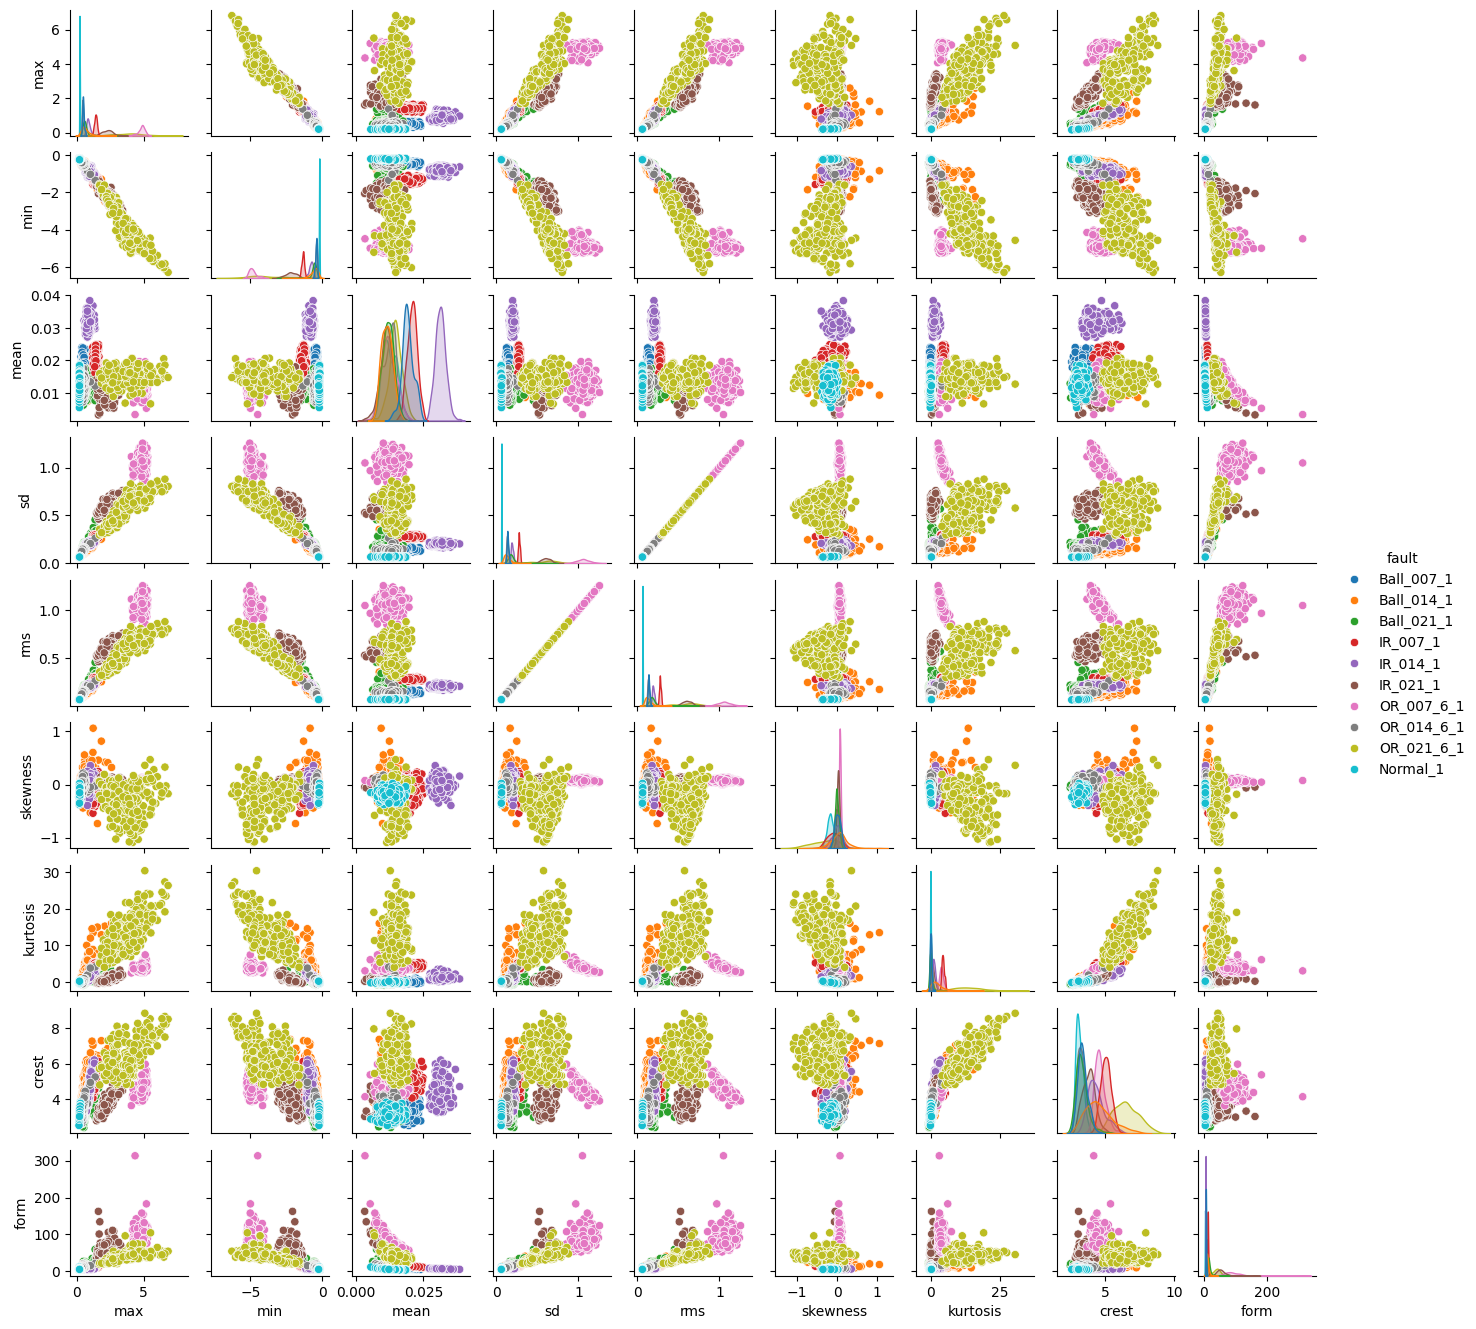

In [34]:
sns.pairplot(df[numeric_features + ['fault']], hue='fault', diag_kind='kde', height=1.5)


### Feature Distributions

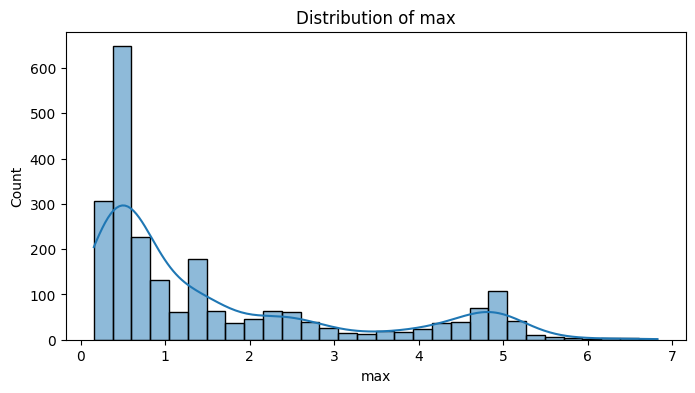

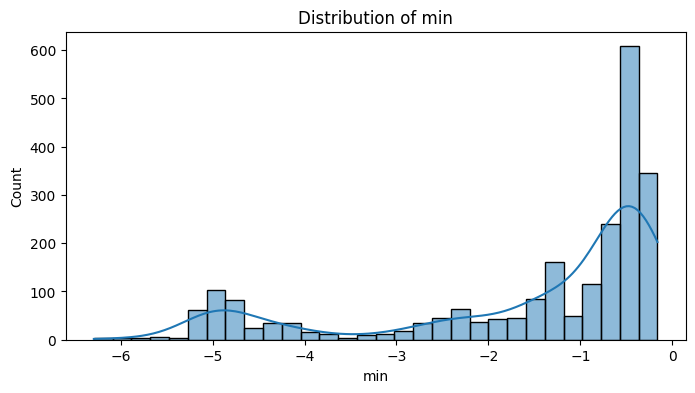

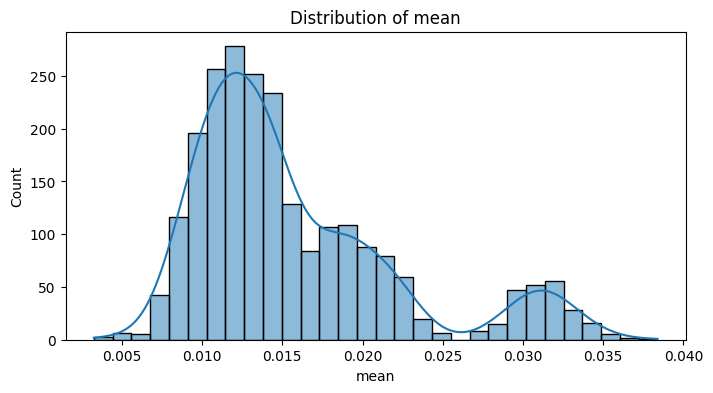

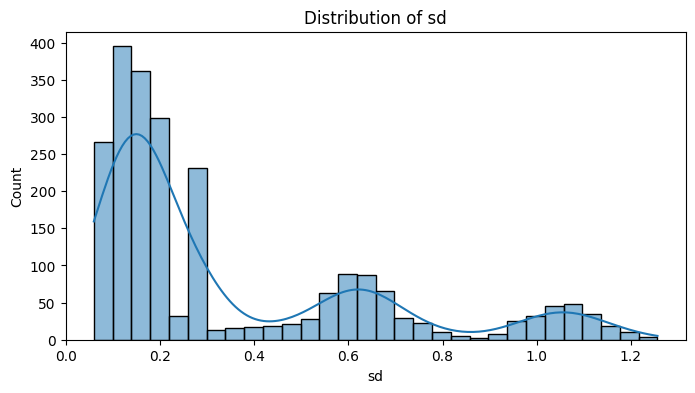

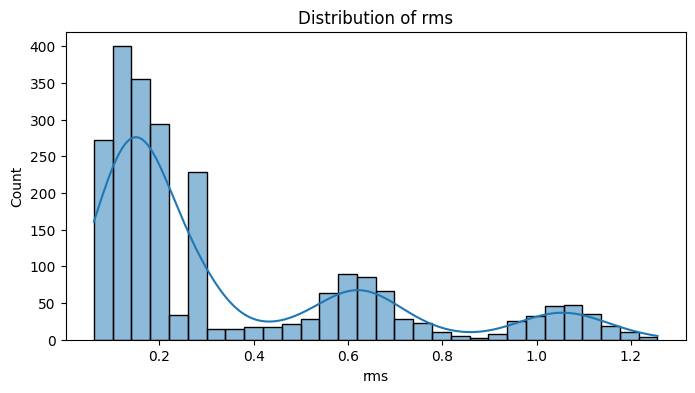

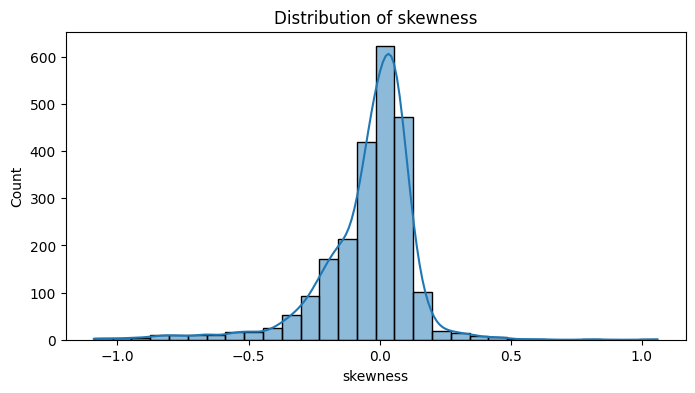

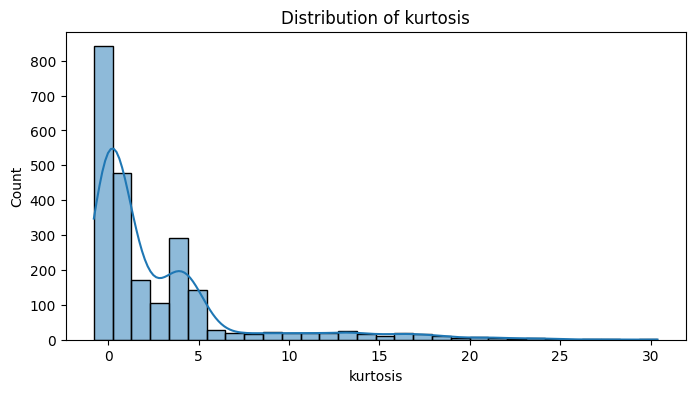

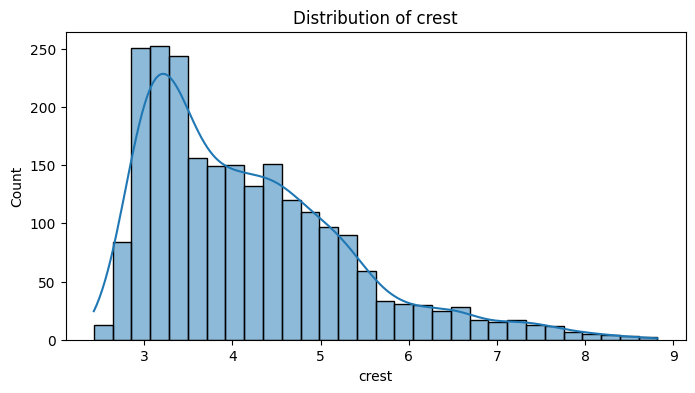

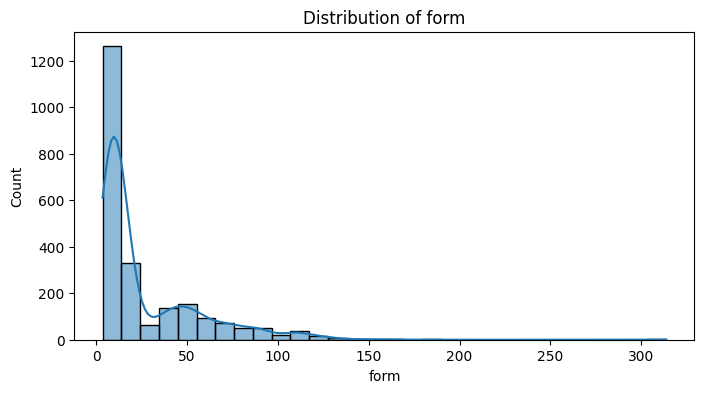

In [35]:
for col in numeric_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


### Outlier Detection

In [36]:
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(df[numeric_features]))
outliers = (z_scores > 3).sum(axis=0)
print("Outlier count per feature:\n", dict(zip(numeric_features, outliers)))


Outlier count per feature:
 {'max': 7, 'min': 0, 'mean': 5, 'sd': 0, 'rms': 0, 'skewness': 50, 'kurtosis': 76, 'crest': 27, 'form': 37}


### PCA

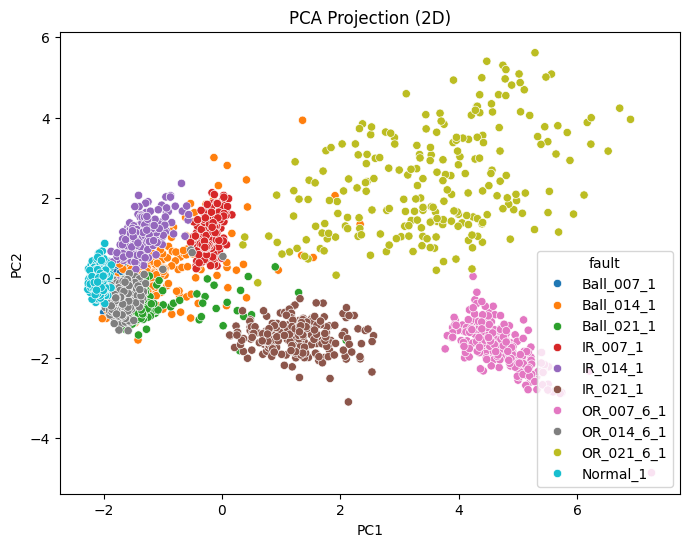

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_features])

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['fault'] = df['fault']

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='fault', data=df_pca)
plt.title("PCA Projection (2D)")
plt.show()


### Feature Importance

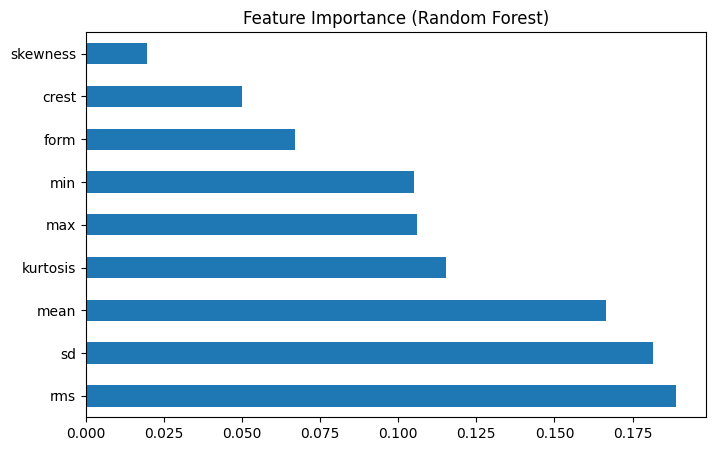

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['fault'])
X = df[numeric_features]

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
feat_imp = pd.Series(importances, index=numeric_features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_imp.plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.show()
